In [1]:
!pip install pandas scikit-learn numpy

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [31]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [26]:
dataset = pd.read_csv('large_data.csv')

In [27]:
X = dataset.drop('DISEASE', axis=1)
y = dataset['DISEASE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:

from sklearn.metrics import confusion_matrix, classification_report


In [29]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
y_pred = rf.predict(X_test)


In [10]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[374  12  20]
 [  9 419   3]
 [ 35   3 357]]

Classification Report:
              precision    recall  f1-score   support

       COVID       0.89      0.92      0.91       406
   INFLUENZA       0.97      0.97      0.97       431
 VIRUS FEVER       0.94      0.90      0.92       395

    accuracy                           0.93      1232
   macro avg       0.93      0.93      0.93      1232
weighted avg       0.93      0.93      0.93      1232



In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.9334415584415584


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [15]:
symptoms_encoder = OneHotEncoder(handle_unknown='ignore')
symptoms_encoder.fit(X_train)
X_train_encoded = symptoms_encoder.transform(X_train)
X_test_encoded = symptoms_encoder.transform(X_test)

In [17]:
rf_scores = cross_val_score(rf, X_train_encoded, y_train, cv=5).mean()

In [18]:
print('Random Forest cross validation scores:', rf_scores)

Random Forest cross validation scores: 0.9257147269900434


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [20]:
import seaborn as sns

In [21]:
import matplotlib.pyplot as plt

In [22]:
cm = confusion_matrix(y_test, y_pred)

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

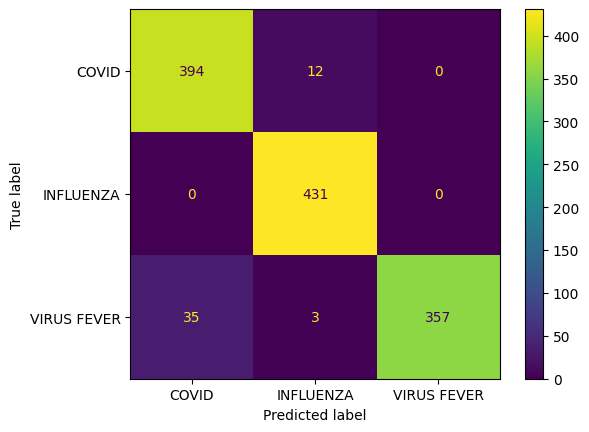

In [40]:
from sklearn.svm import SVC

clf = SVC(random_state=0)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)

disp.plot()